In [9]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import linear_model

class LinearRegression:
    def __init__(self, csv_file):
        self.csv_file = csv_file
    
    def read_csv_file(self):
        dataframe = pd.read_csv(self.csv_file)
        return dataframe
    
    def find_null_values(self, df):
        if df.isnull().values.any():
            print('\n\nDataset has null values: ')
            print(df.isnull().sum())
            print('\n\nFilling null values with mean: ')
            df = df.fillna(df['Weight'].mean())
        else:
            print('Dataset has no null values')
        return df
 
    def linear_plot(self,df):
        x_axis = df['Age']
        y_axis = df['Weight']

        plt.scatter(x_axis, y_axis, color='blue')
        plt.xlabel('Age')
        plt.ylabel('Weight')
        plt.show


    Age  Weight
0    20    60.0
1    21    62.0
2    21    61.0
3    25    64.0
4    22    62.0
5    23    63.0
6    24    64.0
7    26    67.0
8    21     NaN
9    24    65.0
10   23    64.0
11   21     NaN
12   26    67.0
13   25    66.0
14   24     NaN
15   21     NaN
16   23    63.0
17   24     NaN


Dataset has null values: 
Age       0
Weight    5
dtype: int64


Filling null values with mean: 
After filling null values: 
     Age     Weight
0    20  60.000000
1    21  62.000000
2    21  61.000000
3    25  64.000000
4    22  62.000000
5    23  63.000000
6    24  64.000000
7    26  67.000000
8    21  63.692308
9    24  65.000000
10   23  64.000000
11   21  63.692308
12   26  67.000000
13   25  66.000000
14   24  63.692308
15   21  63.692308
16   23  63.000000
17   24  63.692308
[61.82094926 64.46055646 61.82094926 63.5806874 ]
coef:  [0.87986907]
intercept:  43.34369885433715


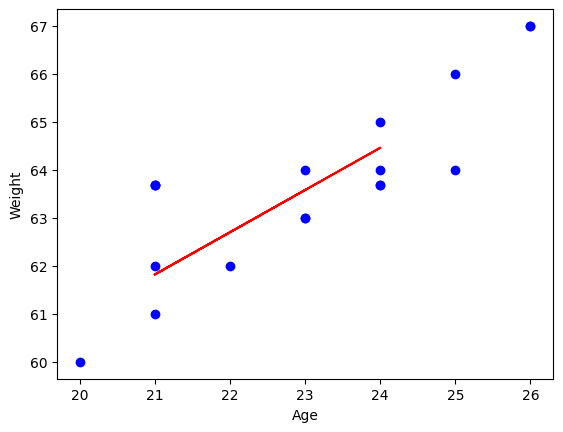

In [12]:
def main():
    filename = 'sample.csv'

    obj = LinearRegression(filename)

    data = obj.read_csv_file()
    print(data)

    preprocessed_data = obj.find_null_values(data)
    print('After filling null values: \n',preprocessed_data)

    obj.linear_plot(preprocessed_data)

    X = preprocessed_data[['Age']]
    y = preprocessed_data['Weight']

    Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.2,random_state = 0)

    lin_reg = linear_model.LinearRegression()
    lin_reg.fit(Xtrain,ytrain)

    predictions = lin_reg.predict(Xtest)
    print(predictions)

    plt.plot(Xtest,predictions,color='r')

    print('coef: ',lin_reg.coef_)
    print('intercept: ',lin_reg.intercept_)

if __name__ == '__main__':
    main()
